

# Global Power Data Exploration

In this notebook, Im gonna do an exploration on global power plant data that i found in kaggle
The purpose of doing this data exploration is to know how is the spread of the global power including the capacity, the plant, and the estimation in the future (2021).

@syahrulmwijaya

#### library used to do the exploration

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly_express as px
import geopandas as gpd
import plotly.graph_objects as go
import folium

#cause when code we will face several long warning messege, we can actually diseable it by
import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")

## Export Dataset

we're gonna use two dataset that will complete each other

###### the first dataset is the powerplant data around the world, and the second dataset used to classify the continent and the sub-region of a country listed on the first dataset

In [3]:
df=pd.read_csv("powerplants (global) - global_power_plants.csv")
df.head()

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,123.77
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.43
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.64
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,225.06
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,406.16


In [4]:
gps=pd.read_csv("countryContinent.csv")
gps.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,�land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


## Data Preprocessing

first, we need to identify the shortage of our dataset including the missing value and the match-spelling between 2 dataset


### Member Assigning

when using dataset that contain information such as country, continent, ets. it's common to find that some country are not assigned to a continent or sub-regioin. 
this could be happen because in the Real-World, those country are not officially signed to such continent or sub-region because the area itself are not connected to a continent, or because something like the distance are too far for those country to be assigned as a member of a continent or sub-region


###### Countries shown bellow are not assigned as a member of any continent

In [5]:
#check missing value of the gps dataset
a = gps['country'][gps['continent'].isnull()]
print(a)

8                                        Antarctica
30                                    Bouvet Island
32                   British Indian Ocean Territory
46                                 Christmas Island
47                          Cocos (Keeling) Islands
78                      French Southern Territories
96                Heard Island and McDonald Islands
206    South Georgia and the South Sandwich Islands
236            United States Minor Outlying Islands
Name: country, dtype: object


the only way to find the right 'continent' value for all listed country above is to look up at google and find the right continent or the closest continent to them




##### code shown bellow is when we assign the right continent for each countries


In [425]:
gps['continent'][gps['country']  == 'Antarctica'] = 'Antarctica'
gps['continent'][gps['country']  == 'Bouvet Island'] = 'Antarctica'
gps['continent'][gps['country']  == 'British Indian Ocean Territory'] = 'Africa'
gps['continent'][gps['country']  == 'Christmas Island'] = 'Oceania'
gps['continent'][gps['country']  == 'Cocos (Keeling) Islands'] = 'Oceania'
gps['continent'][gps['country']  == 'French Southern Territories'] = 'Antarctica'
gps['continent'][gps['country']  == 'Heard Island and McDonald Islands'] = 'Antarctica'
gps['continent'][gps['country']  == 'South Georgia and the South Sandwich Islands'] = 'Americas'
gps['continent'][gps['country']  == 'United States Minor Outlying Islands'] = 'Americas'


In [7]:
#recheck the missing continent value of gps
a = gps['country'][gps['continent'].isnull()]
print(a)

Series([], Name: country, dtype: object)


#### countries shown bellow are not assigned as a member of any sub-region

the reason why we fill the missing value of this column is because we're gonna use the column in the future

In [7]:
a = gps['country'][gps['sub_region'].isnull()]
print(a)

8                                        Antarctica
30                                    Bouvet Island
32                   British Indian Ocean Territory
46                                 Christmas Island
47                          Cocos (Keeling) Islands
78                      French Southern Territories
96                Heard Island and McDonald Islands
206    South Georgia and the South Sandwich Islands
236            United States Minor Outlying Islands
Name: country, dtype: object


In [424]:
gps['sub_region'][gps['country']  == 'Antarctica'] = 'Antarctica'
gps['sub_region'][gps['country']  == 'Bouvet Island'] = 'Antarctica'
gps['sub_region'][gps['country']  == 'British Indian Ocean Territory'] = 'Eastern Africa'
gps['sub_region'][gps['country']  == 'Christmas Island'] = 'Australia and New Zealand'
gps['sub_region'][gps['country']  == 'Cocos (Keeling) Islands'] = 'Australia and New Zealand'
gps['sub_region'][gps['country']  == 'French Southern Territories'] = 'Antarctica'
gps['sub_region'][gps['country']  == 'Heard Island and McDonald Islands'] = 'Antarctica'
gps['sub_region'][gps['country']  == 'South Georgia and the South Sandwich Islands'] = 'South Americas'
gps['sub_region'][gps['country']  == 'United States Minor Outlying Islands'] = 'Northern Americas'


In [15]:
#re-check the sub-region value
a = gps['country'][gps['sub_region'].isnull()]
print(a)

Series([], Name: country, dtype: object)


### Match-Spelling Between 2 Dataset

match-spelling is important to make 2 dataset synchronized to each other. 
if the match-spelling are not done, the possibility of error when processing the data would be high 

#### Checking country spelled different from the gps dataset in the df dataset 

In [9]:
different = []
for i in sorted(df['country_long'].unique()):
    if len(gps.country[gps.country == i].values) == 0:
        different.append(i)
print(different)

#the data below are from the gps dataset

['Bolivia', 'Cape Verde', 'Cote DIvoire', 'Democratic Republic of the Congo', 'Iran', 'Kosovo', 'Laos', 'Macedonia', 'Moldova', 'North Korea', 'Palestine', 'Russia', 'South Korea', 'Taiwan', 'Tanzania', 'United Kingdom', 'Venezuela', 'Vietnam']


#### Checking country spelled different from the df dataset in the gps dataset 

In [10]:
different = []
for i in sorted(gps['country'].unique()):
    if len(df.country_long[df.country_long == i].values) == 0:
        different.append(i)
print(different)

#the data below are from the df dataset

['American Samoa', 'Andorra', 'Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bouvet Island', 'British Indian Ocean Territory', 'Cabo Verde', 'Cayman Islands', 'Chad', 'Christmas Island', 'Cocos (Keeling) Islands', 'Comoros', 'Congo (Democratic Republic of the)', 'Cook Islands', 'Cura�ao', "C�te d'Ivoire", 'Dominica', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Polynesia', 'French Southern Territories', 'Gibraltar', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guernsey', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See', 'Hong Kong', 'Iran (Islamic Republic of)', 'Isle of Man', 'Jersey', 'Kiribati', "Korea (Democratic People's Republic of)", 'Korea (Republic of)', "Lao People's Democratic Republic", 'Liechtenstein', 'Macao', 'Macedonia (the former Yugoslav Republic of)', 'Maldives', 'Malta', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia (Feder

#### Matching the spelling

since the misspelling in df are lot less than in the gps, so we only need to match the spelling in gps to save the time

In [11]:
df.replace({'Kosovo':'Albania'},inplace=True) #kosovo declared as albania since both country has the same etnic, and cause albania is much familiar than the kosovo

gps.replace({'Bolivia (Plurinational State of)':'Bolivia',
             'Cabo Verde':'Cape Verde',
             "Côte d'Ivoire":"Cote DIvoire",
             'Congo (Democratic Republic of the)':'Democratic Republic of the Congo',
             'Iran (Islamic Republic of)':'Iran',
             'Lao People\'s Democratic Republic':'Laos',
             'Macedonia (the former Yugoslav Republic of)':'Macedonia',
             'Moldova (Republic of)':'Moldova',
             'Korea (Democratic People\'s Republic of)':'North Korea',
             'Palestine, State of':'Palestine',
             'Russian Federation':'Russia',
             'Korea (Republic of)':'South Korea',
             'Taiwan, Province of China':'Taiwan',
             'Tanzania, United Republic of':'Tanzania',
             'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
             'Venezuela (Bolivarian Republic of)':'Venezuela',
             'Viet Nam':'Vietnam'}, 
            inplace=True)

#### Re-checking the misspelling in df

In [12]:
different = []
for i in sorted(df['country_long'].unique()):
    if len(gps.country[gps.country == i].values) == 0:
        different.append(i)
print(different)

['Cote DIvoire']


In [13]:
country = df['country_long'].unique()
country = pd.DataFrame(data=country, columns=['country'])
print(country.iloc[34])

country    Cote DIvoire
Name: 34, dtype: object


Since the name are actually spelled correctly in the dataset, we can assume that the job has been done correctly

### Combining Dataset

we need to lookup at the gps dataset to determine which data that we will take to complete the df dataset

In [14]:
gps.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,�land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


 Take only the important column of the gps dataset  

In [15]:
gps.drop(["code_2", "code_3", "iso_3166_2", "region_code", "sub_region_code", "country_code"], axis=1, inplace=True)
gps.head()

,country,continent,sub_region
0,Afghanistan,Asia,Southern Asia
1,�land Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


check again to determine which column of the main dataset (df) that we're gonna match with the selected column of the gps dataset

In [16]:
df.head()

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,123.77
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.43
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.64
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,225.06
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,406.16


#### combine the dataset

In [17]:
df_fix = df.join(gps.set_index('country'), on='country_long')
df_fix.head()


,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021,continent,sub_region
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,123.77,Asia,Southern Asia
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.43,Asia,Southern Asia
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.64,Asia,Southern Asia
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,225.06,Asia,Southern Asia
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,406.16,Asia,Southern Asia


### Handling Missing Value

we can handle the missing value with some method, but in this case, I handle the missing value with the imputation method for each column. Imputation method fall into three submethod, which are.
- the mean imputation
- median imputation 
- and most frequent (modus) imputation.


count total missing value for each columns of the dataset

In [18]:
#count total missing value in each columns
missing=[]
for i in df_fix.columns:
    a=df_fix[i].isnull().sum()
    missing.append(a)

print(missing)

[0, 0, 0, 0, 0, 0, 0, 32992, 34660, 34844, 17489, 14068, 25277, 419, 18816, 8, 8]


since there's still missing value in the continent and sub-region column, we need to find which country that provide that missing value

#### extract missing value of a country based on the continent and subregion

In [19]:
a = df_fix['country_long'][df_fix['continent'].isnull()].unique()
print(a)

['Cote DIvoire']


re-assign the cuontry to a continent

In [426]:
df_fix['continent'][df_fix['country_long']  == "Cote DIvoire"] = 'Africa'

Re-check the missing value in the continent column

In [21]:
a = df_fix['country_long'][df_fix['continent'].isnull()].unique()
print(a)

[]


do the same for the missing value in the sub-region column

In [22]:
a = df_fix['country_long'][df_fix['sub_region'].isnull()].unique()
print(a)

['Cote DIvoire']


In [427]:
df_fix['sub_region'][df_fix['country_long']  == "Cote DIvoire"] = 'West Africa'

Re-check the missing value in the sub-region column

In [24]:
a = df_fix['country_long'][df_fix['sub_region'].isnull()].unique()
print(a)

[]


#### handling the missing value that doesnt related with location items

check again the missing value in each columns of the dataset

In [25]:
# recheck the missing value again of the fixed dataset
missing=[]
for i in df_fix.columns:
    a=df_fix[i].isnull().sum()
    missing.append(a)

print(missing)

[0, 0, 0, 0, 0, 0, 0, 32992, 34660, 34844, 17489, 14068, 25277, 419, 18816, 0, 0]


next, we need to check the type of the values for each columns to determine which method should we use to handle the missing value

In [26]:
#check the type of each columns
tipe=[]
for i in df_fix.columns:
    b=df_fix[i].dtype.name
    tipe.append(b)

print(tipe)

['object', 'object', 'object', 'float64', 'float64', 'float64', 'object', 'object', 'object', 'object', 'float64', 'object', 'float64', 'object', 'float64', 'object', 'object']


#### Handle the missing value

as you can se that we have already handle all the missing value as the table of the dataset shown bellow

In [27]:
#for the object type column, we handle the missing value by modus imputation
#for the numerical type column, we handle the missing value by mean imputation
for i in df_fix.columns:
    if df_fix[i].dtype.name == 'object':
        imputer = SimpleImputer(strategy='most_frequent')
        df_fix[i]=imputer.fit_transform(df_fix[[i]])
    
    else:
        imputer1 = SimpleImputer(strategy='mean')
        df_fix[i]=imputer1.fit_transform(df_fix[[i]])
        
df_fix.head()

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021,continent,sub_region
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,Oil,Gas,Gas,1997.414823,Cypress Creek Renewables,423.922436,GEODB,123.77,Asia,Southern Asia
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,Oil,Gas,Gas,1997.414823,Cypress Creek Renewables,423.922436,Wiki-Solar,18.43,Asia,Southern Asia
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,Oil,Gas,Gas,1997.414823,Cypress Creek Renewables,423.922436,Wiki-Solar,18.64,Asia,Southern Asia
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,Oil,Gas,Gas,1997.414823,Cypress Creek Renewables,423.922436,GEODB,225.06,Asia,Southern Asia
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,Oil,Gas,Gas,1997.414823,Cypress Creek Renewables,423.922436,GEODB,406.16,Asia,Southern Asia


  .

## Make Sub-Dataset



sub-dataset are useful when it comes to a big data like the data that we're gonna explore, sub-dataset help us focus on a smaller object

first we need to find the total capacity of all the powerplants in the dataset

In [28]:
total_cap = df_fix['capacity in MW'].sum()
print(total_cap)

5706975.447256999


### Capacity Dataset

the capacity of each same name country is summed, and the dataset will be rearranged from the most capacity to the least

#### df_capacity

In [46]:
df_capacity = df_fix['capacity in MW'].groupby(df_fix['country_long']).sum().sort_values(ascending=False).reset_index()
df_capacity['percent'] = df_capacity['capacity in MW']*100/total_cap
country_codes_capacity=df_fix['capacity in MW'].groupby(df_fix['country code']).sum().sort_values(ascending=False).reset_index()



df_capacity_with_codes = pd.merge(df_capacity,country_codes_capacity, on='capacity in MW')

column_order = ['country code'] + list(df_capacity_with_codes.columns[:-1])

#df_capacity_with_codes = df_capacity_with_codes['country code'].move_to_front(0) 

df_capacity = df_capacity_with_codes.reindex(columns=column_order)
df_capacity.head()

,country code,country_long,capacity in MW,percent
0,CHN,China,1415067.380,24.795400
1,USA,United States of America,1204638.050,21.108169
2,IND,India,316088.546,5.538635
3,RUS,Russia,228220.050,3.998967
4,JPN,Japan,215365.850,3.773730


### Estimation Dataset 

same as the capacity, the estimation also summed for each country and rearranged from the most to the least

#### df_estimation

In [47]:
df_estimation = df_fix['estimated_generation_gwh_2021'].groupby(df_fix['country_long']).sum().sort_values(ascending=False).reset_index()
est_country_codes =  df_fix['estimated_generation_gwh_2021'].groupby(df_fix['country code']).sum().sort_values(ascending=False).reset_index()
df_estimation = pd.merge(df_estimation, est_country_codes, on='estimated_generation_gwh_2021')
column=['country code'] + list(df_estimation.columns[:-1])
df_estimation=df_estimation.reindex(columns=column)
df_estimation['percent'] = df_estimation['estimated_generation_gwh_2021']*100/total_cap
df_estimation.head()

,country code,country_long,estimated_generation_gwh_2021,percent
0,USA,United States of America,2.254180e+06,39.498674
1,CHN,China,1.216640e+06,21.318473
2,BRA,Brazil,6.986342e+05,12.241760
3,CAN,Canada,4.484468e+05,7.857872
4,GBR,United Kingdom,3.836924e+05,6.723219


### Total powerplant Dataset

total powerplants for each country

#### df_powerplnt

In [31]:
df_powerplnt = df_fix['name of powerplant'].groupby(df_fix['country_long']).count().sort_values(ascending=False).reset_index()
pwrplnt_country_codes = df_fix['name of powerplant'].groupby(df_fix['country code']).count().sort_values(ascending=False).reset_index()
df_powerplnt = pd.merge(df_powerplnt, pwrplnt_country_codes, on='name of powerplant')
column = ['country code']+list(df_powerplnt.columns[:-1])
df_powerplnt = df_powerplnt.reindex(columns=column)
df_powerplnt.rename(columns={'name of powerplant':'total_powerplant'}, inplace=True)
df_powerplnt.head()

,country code,country_long,total_powerplant
0,USA,United States of America,9833
1,CHN,China,4235
2,GBR,United Kingdom,2751
3,BRA,Brazil,2360
4,FRA,France,2155


### Combine World Dataset

In [134]:
world = pd.merge(df_capacity, df_estimation, on='country code')
world = pd.merge(world, df_powerplnt, on='country code')

world.drop(['country_long', 'country_long_y'], axis=1,inplace=True)
world.rename(columns={'country_long_x':'country_long', 'percent_x':'percent_capacity','percent_y':'percent_estimation'}, inplace=True)

world.head()

,country code,country_long,capacity in MW,percent_capacity,estimated_generation_gwh_2021,percent_estimation,total_powerplant
0,CHN,China,1415067.380,24.795400,1.216640e+06,21.318473,4235
1,USA,United States of America,1204638.050,21.108169,2.254180e+06,39.498674,9833
2,IND,India,316088.546,5.538635,3.541017e+05,6.204718,1589
3,RUS,Russia,228220.050,3.998967,2.683872e+05,4.702793,545
4,JPN,Japan,215365.850,3.773730,1.182263e+05,2.071611,522


Total powerplant for each continent

#### df_continent_powerplnt

In [32]:
df_continent_powerplnt = df_fix['name of powerplant'].groupby(df_fix['continent']).count().sort_values(ascending=False).reset_index()
df_continent_powerplnt.rename(columns={'name of powerplant':'total_powerplant'}, inplace=True)
df_continent_powerplnt.head()

,continent,total_powerplant
0,Americas,14654
1,Europe,10763
2,Asia,8330
3,Africa,631
4,Oceania,556


## Fuel Dataset

#### df_fuel

In [33]:
df_fuel = df_fix['capacity in MW'].groupby(df_fix['primary_fuel']).sum().sort_values(ascending=False).reset_index()
df_fuel['percent'] = df_fuel['capacity in MW']*100/total_cap
df_fuel.head()

,primary_fuel,capacity in MW,percent
0,Coal,1.965541e+06,34.441028
1,Gas,1.493051e+06,26.161854
2,Hydro,1.053160e+06,18.453901
3,Nuclear,4.079118e+05,7.147600
4,Wind,2.630537e+05,4.609337


### ASEAN Dataset

since it was pretty confusing on how we spell the sub-region of Asia, I want to list them all first to make the job easier

In [34]:
#get all sub_region in dataset
sub_reg = df_fix['sub_region'].unique()
print(sub_reg)

['Southern Asia' 'Southern Europe' 'Northern Africa' 'Middle Africa'
 'Antarctica' 'South America' 'Western Asia' 'Australia and New Zealand'
 'Western Europe' 'Eastern Europe' 'Western Africa' 'Southern Africa'
 'South-Eastern Asia' 'Eastern Africa' 'Northern America' 'Eastern Asia'
 'Central America' 'West Africa' 'Caribbean' 'Northern Europe' 'Melanesia'
 'Central Asia']


#### asean_cap

In [53]:
asean_cap = df_fix['capacity in MW'][df_fix['sub_region'] == 'South-Eastern Asia'].groupby(df_fix['country_long']).sum().sort_values(ascending=False).reset_index()
country_codes_capacity=df_fix['capacity in MW'][df_fix['sub_region'] == 'South-Eastern Asia'].groupby(df_fix['country code']).sum().sort_values(ascending=False).reset_index()
asean_cap['percent']=asean_cap['capacity in MW']*100/(asean_cap['capacity in MW'].sum())


df_capacity_with_codes = pd.merge(asean_cap,country_codes_capacity, on='capacity in MW')
column_order = ['country code'] + list(df_capacity_with_codes.columns[:-1])
 


asean_cap = df_capacity_with_codes.reindex(columns=column_order)
asean_cap.head()

#asean_cap.head()

,country code,country_long,capacity in MW,percent
0,IDN,Indonesia,48751.418,23.896867
1,VNM,Vietnam,41350.490,20.269096
2,THA,Thailand,39654.300,19.437661
3,MYS,Malaysia,28794.500,14.114427
4,PHL,Philippines,20719.300,10.156143


#### asean_est

In [55]:
asean_est = df_fix['estimated_generation_gwh_2021'][df_fix['sub_region'] == 'South-Eastern Asia'].groupby(df_fix['country_long']).sum().sort_values(ascending=False).reset_index()
country_codes = df_fix['estimated_generation_gwh_2021'][df_fix['sub_region'] == 'South-Eastern Asia'].groupby(df_fix['country code']).sum().sort_values(ascending=False).reset_index()
asean_est['percent']=asean_est['estimated_generation_gwh_2021']*100/(asean_est['estimated_generation_gwh_2021'].sum())

asean_est = pd.merge(asean_est, country_codes, on='estimated_generation_gwh_2021')
column_order = ['country code'] + list(asean_est.columns[:-1])
asean_est = asean_est.reindex(columns=column_order)

asean_est.head()

,country code,country_long,estimated_generation_gwh_2021,percent
0,VNM,Vietnam,77463.672159,34.444125
1,IDN,Indonesia,47275.574256,21.021025
2,PHL,Philippines,28508.994330,12.676489
3,THA,Thailand,27691.167717,12.312843
4,MMR,Myanmar,14801.351092,6.581402


#### asean_powerplant

In [37]:
asean_powerplnt = df_fix['name of powerplant'][df_fix['sub_region'] == 'South-Eastern Asia'].groupby(df_fix['country_long']).count().sort_values(ascending=False).reset_index()
asean_country_codes = df_fix['name of powerplant'][df_fix['sub_region'] == 'South-Eastern Asia'].groupby(df_fix['country code']).count().sort_values(ascending=False).reset_index()

asean_powerplant = pd.merge(asean_powerplnt, asean_country_codes, on='name of powerplant')
column = ['country code']+list(asean_powerplant.columns[:-1])
asean_powerplant = asean_powerplant.reindex(columns=column)
asean_powerplant.rename(columns = {'name of powerplant':'total_powerplant'}, inplace=True)

asean_powerplant.head()

,country code,country_long,total_powerplant
0,VNM,Vietnam,236
1,THA,Thailand,196
2,IDN,Indonesia,178
3,PHL,Philippines,123
4,MYS,Malaysia,55


### Combine all ASEAN dataset 

In [423]:
asean = pd.merge(asean_cap, asean_powerplant, on='country code')
asean = pd.merge(asean, asean_est, on='country code')
asean.drop(['country_long_y', 'country_long'], axis=1, inplace=True)
asean.rename(columns={'country_long_x':'country_long', 'percent_x':'percent_capacity', 'percent_y':'percent_estimation'}, inplace=True)
asean.head()

,country code,country_long,capacity in MW,percent_capacity,total_powerplant,estimated_generation_gwh_2021,percent_estimation
0,IDN,Indonesia,48751.418,23.896867,178,47275.574256,21.021025
1,VNM,Vietnam,41350.490,20.269096,236,77463.672159,34.444125
2,THA,Thailand,39654.300,19.437661,196,27691.167717,12.312843
3,MYS,Malaysia,28794.500,14.114427,55,13131.011067,5.838688
4,PHL,Philippines,20719.300,10.156143,123,28508.994330,12.676489


### Indonesia Dataset

In [300]:
indo_map = df_fix[df_fix['country_long']=='Indonesia']
indo_map.head()

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021,continent,sub_region
15641,IDN,Indonesia,Amamapare Port power station,195.000,-4.8278,136.8391,Coal,Oil,Gas,Gas,1998.000000,PT Puncakjaya Power,423.922436,GCPT,239.112221,Asia,South-Eastern Asia
15642,IDN,Indonesia,Ampenan,56.284,-8.5667,116.0667,Oil,Oil,Gas,Gas,1997.414823,PLN - West Nusa Tenggara Regional Unit/NTB,423.922436,CARMA,239.112221,Asia,South-Eastern Asia
15643,IDN,Indonesia,Amurang power station,60.000,1.1825,124.4806,Coal,Oil,Gas,Gas,2012.000000,PLN,423.922436,GCPT,239.112221,Asia,South-Eastern Asia
15644,IDN,Indonesia,Asahan I,180.000,2.5113,99.2590,Hydro,Oil,Gas,Gas,1997.414823,PT Bajradaya Sentranusa (China Huadian Corpora...,423.922436,WRI,614.230000,Asia,South-Eastern Asia
15645,IDN,Indonesia,Bakaru,126.000,-3.1141,119.6042,Hydro,Oil,Gas,Gas,1997.414823,PLN-South&South East Sulawesi Regional Unit,423.922436,CARMA,423.600000,Asia,South-Eastern Asia


## Color pallete for each fuel

the color pallete used to ensure that the color for each fuel is consistent

In [38]:
fuel = df_fix['primary_fuel'].unique()
print(fuel)

['Hydro' 'Solar' 'Gas' 'Other' 'Oil' 'Wind' 'Nuclear' 'Coal' 'Waste'
 'Biomass' 'Wave and Tidal' 'Petcoke' 'Geothermal' 'Storage'
 'Cogeneration']


In [120]:
#define color for each fuel
fuels = {'Hydro':'blue',
        'Solar':'Orange',
        'Gas':'yellowgreen',
        'Other':'teal',
        'Oil':'dimgrey',
        'Wind':'skyblue',
        'Nuclear':'gold',
        'Coal':'black',
        'Waste':'sienna',
        'Biomass':'brown',
        'Wave and Tidal':'aqua',
        'Petcoke':'tan',
        'Geothermal':'green',
        'Storage':'silver',
        'Cogeneration':'plum'
         }

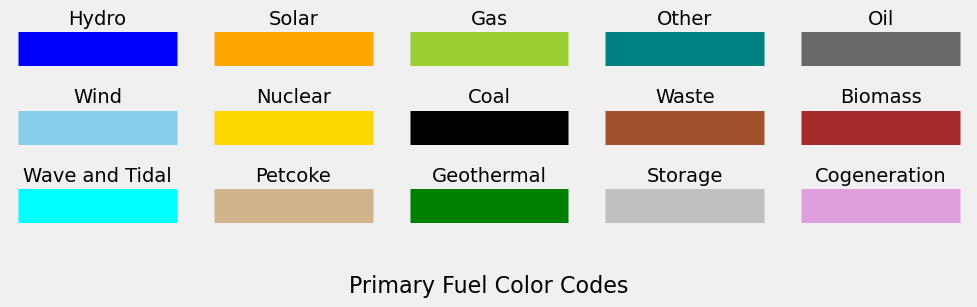

In [123]:
#plot the figure format
plt.figure(figsize=(10,3))
plt.suptitle('Primary Fuel Color Codes', y = -0.1, fontsize = 16)
a, b, c = 3, 5, 1   # rows, columns, counter

#plot each color
for x in fuels:
    plt.subplot(a, b, c)  # row, column, counter
    plt.axis('off')
    plt.title(x, fontsize = 14)
    plt.hlines(0,0,10, color = fuels[x] ,linestyles = 'solid', linewidth = 35)
    c = c + 1

plt.tight_layout()
plt.show()

## Visualization in world map

the visualization bellow is to visualize the capacity and the power generation in 2021 

### World Capacity

In [155]:
#df_capacity=pd.DataFrame(df.groupby('country code')['capacity in MW'].sum())
#line diatas akan membuat dataset baru dengan index countrycode dan nilai capacity inMW
max_cap = df_fix['capacity in MW'].max()
min_cap = df_fix['capacity in MW'].min()
fig = px.choropleth(df_capacity,
                    locations=df_capacity['country code'],
                    color='capacity in MW',
                    scope='world',
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                    range_color=(min_cap, 50*max_cap),
                    title='Power Capacity In The World (MW)',
                    height=600
                    )
fig.update_layout( coloraxis_colorbar=dict( title="MW"))
fig.show()

from the hotmap above we can see that most energy are stored in China and America that both country have almost 50% of the total energy capacity in the world 

### Estimation of GWH of world in 2021

In [156]:
#df_capacity=pd.DataFrame(df.groupby('country code')['estimated_generation_gwh_2021'].sum())
#line diatas akan membuat dataset baru dengan index countrycode dan nilai capacity inMW
max_est = df_estimation['estimated_generation_gwh_2021'].max()
min_est = df_estimation['estimated_generation_gwh_2021'].min()
fig = px.choropleth(df_estimation,
                    locations=df_estimation['country code'],
                    color='estimated_generation_gwh_2021',
                    scope='world',
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                    range_color=(min_est,max_est),
                    title='Estimation Power Capacity Generation In The Future',
                    height=600
                    )

fig.update_layout( coloraxis_colorbar=dict( title="GWH"))
fig.show()

from the hotmap above, we can see that USA has the most estimated generation of Power Capacity in 2021

### ASEAN Capacity

In [157]:
max_asean_cap = asean_cap['capacity in MW'].max()
min_asean_cap = asean_cap['capacity in MW'].min()
fig = px.choropleth(asean_cap,
                    locations=asean_cap['country code'],
                    color='capacity in MW',
                    scope='asia',
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                    range_color=(min_asean_cap,max_asean_cap),
                    title='Power Capacity In SEA (MW)',
                    height=600
                    )
fig.update_layout( coloraxis_colorbar=dict( title="MW"))
fig.show()

### ASEAN estimation of GWH in 2021

In [152]:
max_asean_est = asean_est['estimated_generation_gwh_2021'].max()
min_asean_est = asean_est['estimated_generation_gwh_2021'].min()
fig = px.choropleth(asean_est,
                    locations=asean_est['country code'],
                    color='estimated_generation_gwh_2021',
                    scope='asia',
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                    range_color=(min_asean_est,max_asean_est),
                    title='Estimation Power Capacity Generated In The Future',
                    height=600
                    )
fig.update_layout( coloraxis_colorbar=dict( title="GWH"))
fig.show()

### powerplant spread in ASEAN

In [154]:
max_asean_plnt = asean_powerplant['total_powerplant'].max()
min_asean_plnt = asean_powerplant['total_powerplant'].min()
fig = px.choropleth(asean_powerplant,
                    locations=asean_powerplant['country code'],
                    color='total_powerplant',
                    scope='asia',
                    color_continuous_scale=px.colors.sequential.YlGnBu,
                    range_color=(min_asean_plnt,max_asean_plnt),
                    title='Powerplant Spread in SEA',
                    height=600
                    )
fig.update_layout( coloraxis_colorbar=dict( title="total powerplant"))
fig.show()

## Data Visualization

### World Capacity and Powerplants

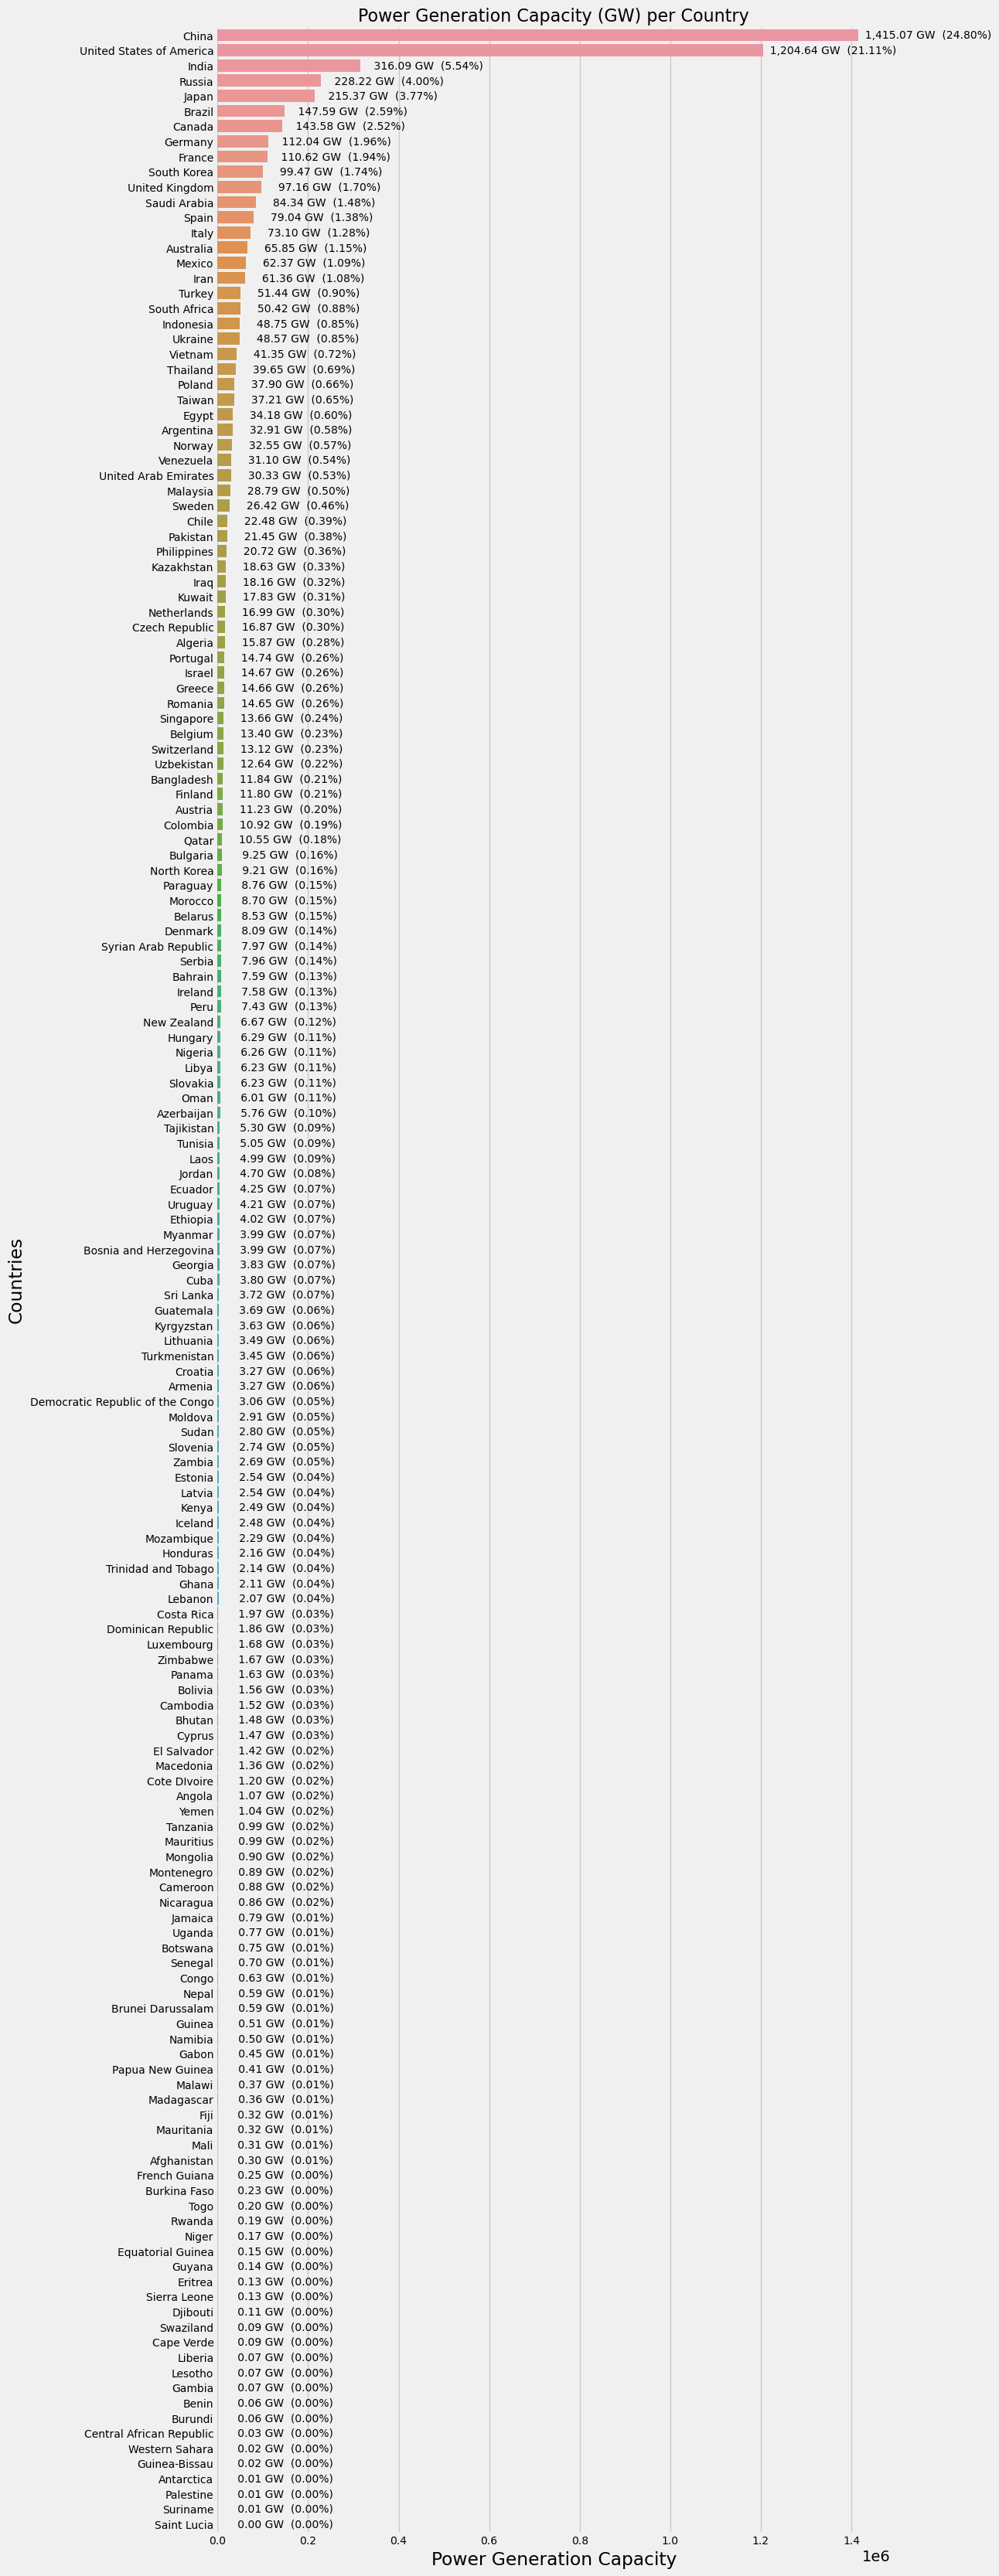

In [368]:
#plot the figure
plt.figure(figsize=(10,40))
ax = sns.barplot(data = world, x = 'capacity in MW', y='country_long')
plt.title('Power Generation Capacity (GW) per Country', fontsize = 16)
plt.ylabel("Countries")
plt.xlabel("Power Generation Capacity")

#give each value capacity for each country plotted
for p in ax.patches:
    x = p.get_width()
    cap_per = "{:>10,.2f} GW  ({:,.2f}%)".format(x/1000, x*100/total_cap)
    ax.annotate("{}".format(cap_per), (p.get_x() + p.get_width()+.4, p.get_y() + .4), ha='left', va='center', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)

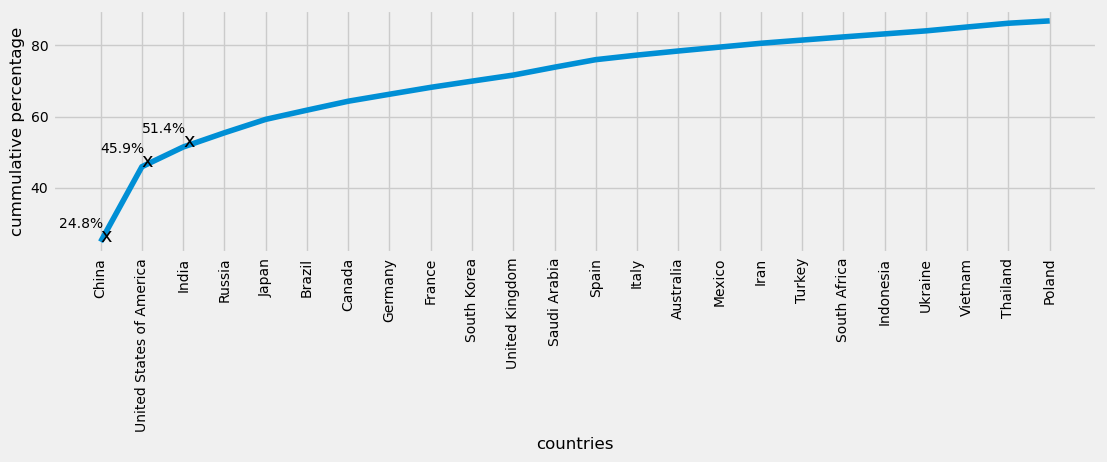

In [347]:
world['cumsum']=world['percent_capacity'].cumsum()
plt.figure(figsize=(12,3))
ax=sns.lineplot(data = world.head(26), x = 'country_long', y = 'cumsum')
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("countries", fontsize=12)
plt.ylabel('cummulative percentage', fontsize=12)
    
for i, j in enumerate(world['country_long']):
    if i <= 2:
        y = world['cumsum'].loc[i]
        plt.text(i-1 , y + 4, '{:,.1f}%'.format(y), fontsize=10)
        plt.text(i, y, 'x', color = 'k')
plt.show()

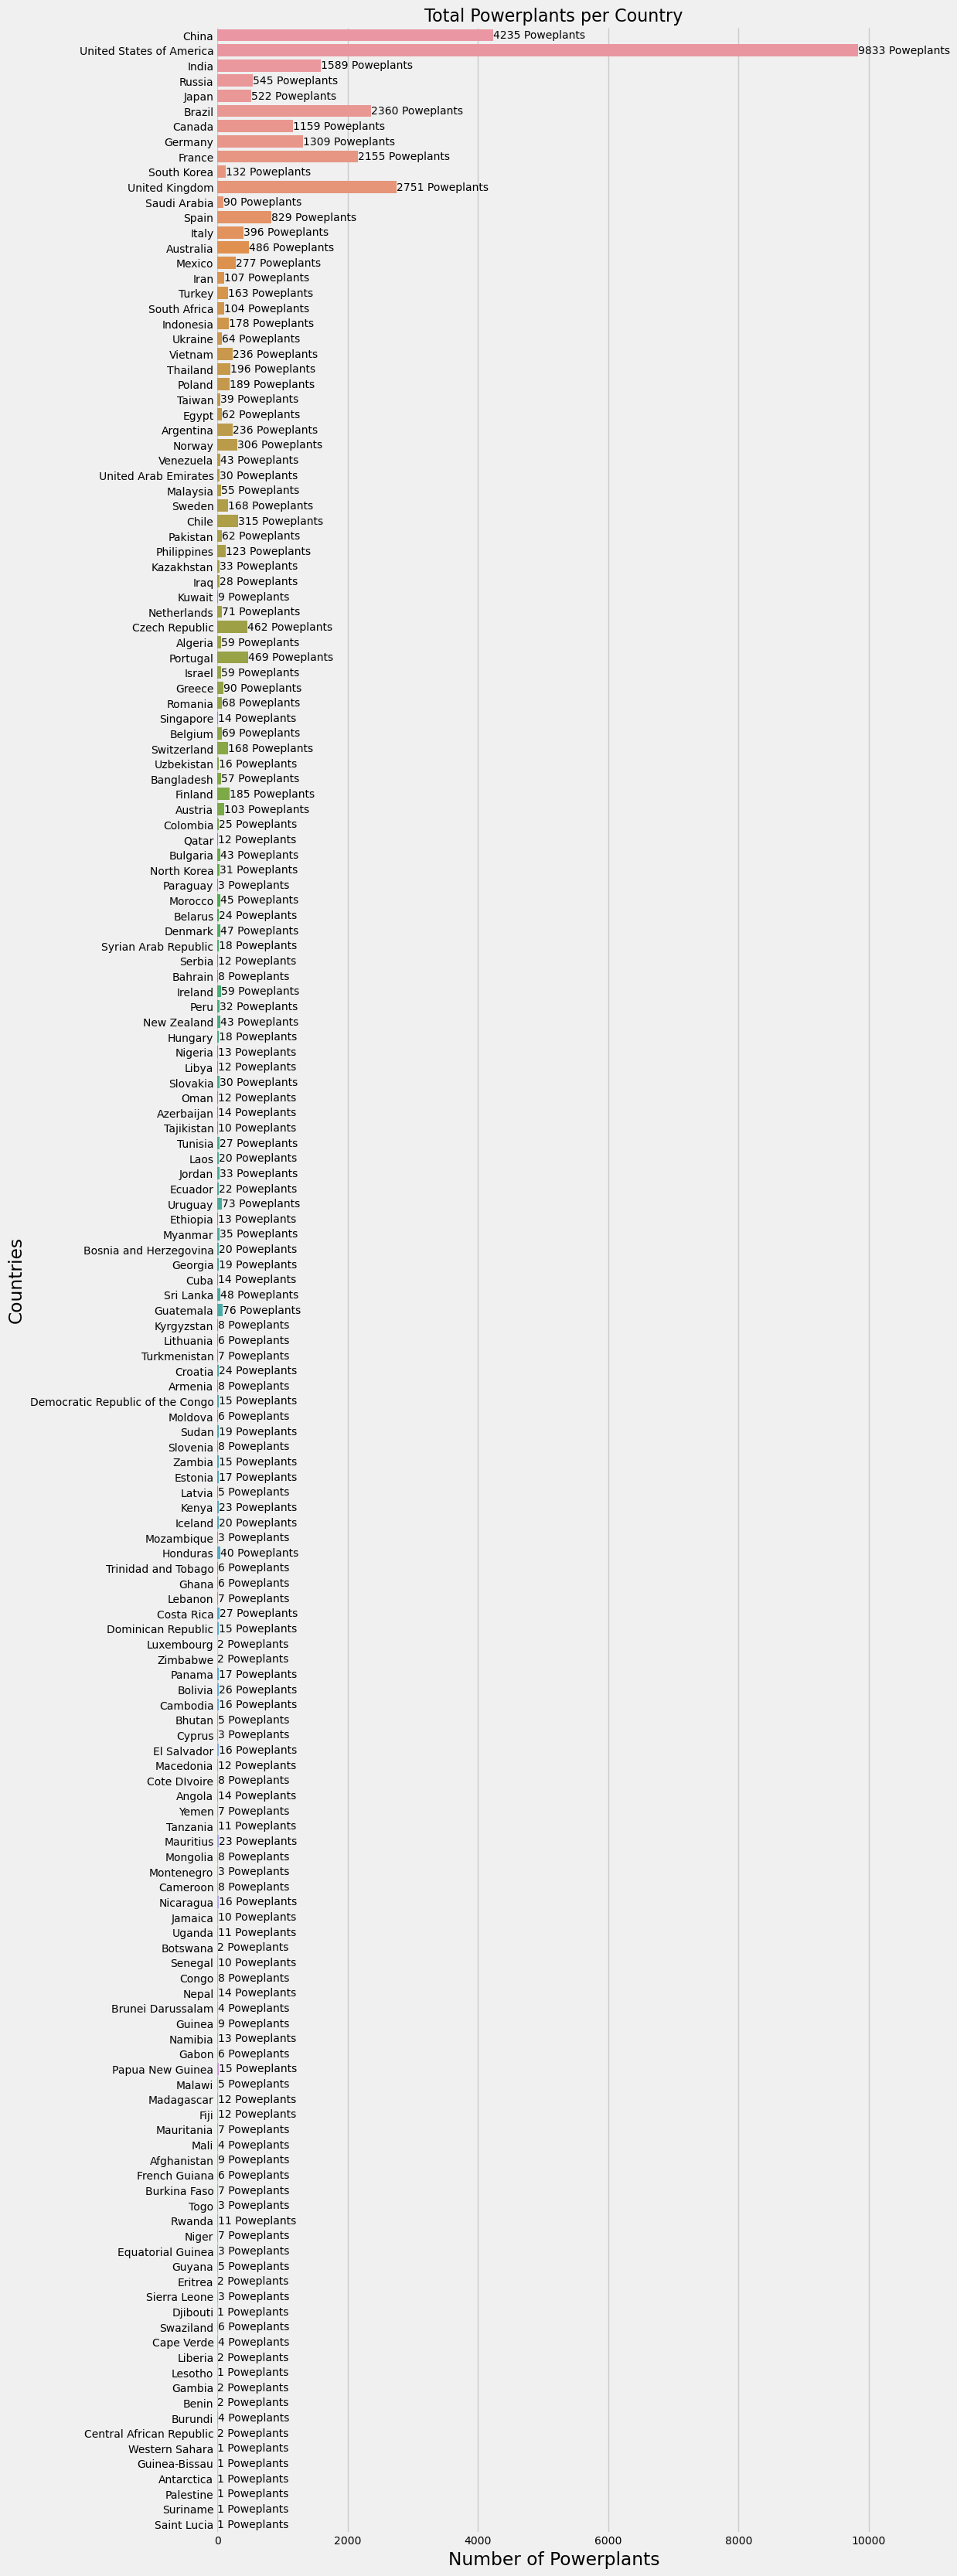

In [367]:
#plot the figure
plt.figure(figsize=(10,40))
ax = sns.barplot(data = world, x = 'total_powerplant', y='country_long')
plt.title('Total Powerplants per Country', fontsize = 16)
plt.ylabel("Countries")
plt.xlabel("Number of Powerplants")

#give each value capacity for each country plotted
for p in ax.patches:
    x = p.get_width()
    cap_per = "{:d} Poweplants".format(int(x))
    ax.annotate("{}".format(cap_per), (p.get_x() + p.get_width(), p.get_y() + .4), ha='left', va='center', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)

From the plot above, we can see that eventho China have less powerplants compared to USA, China still be the most country with Power Capacity in The World. And we can see the terrifying fact that more than 50% of power capacity in the world are located in only 3 country which are USA, China, and India.

### World Estimation Power Generation Capacity in 2021

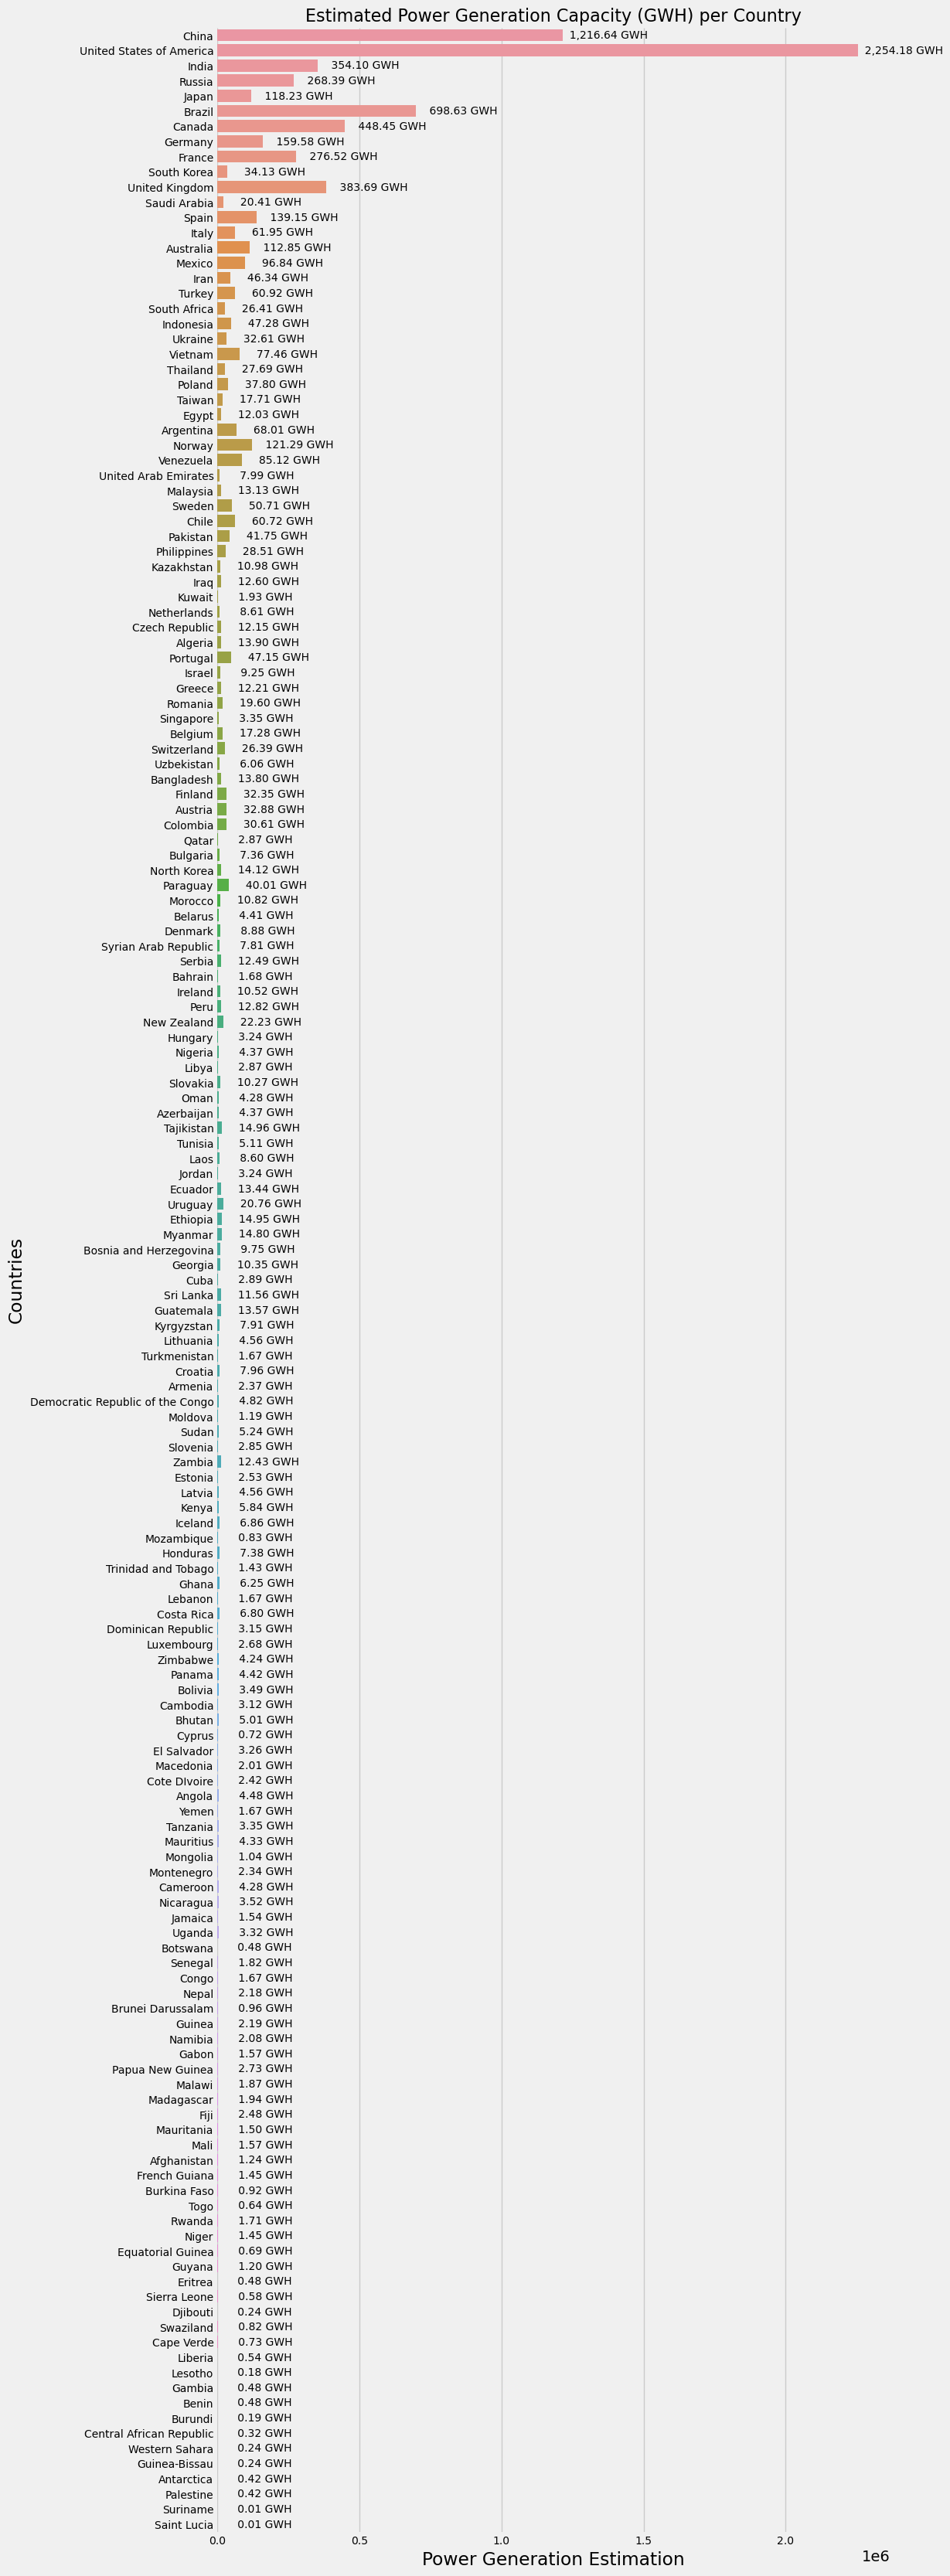

In [366]:
#plot the figure
plt.figure(figsize=(10,40))
ax = sns.barplot(data = world, x = 'estimated_generation_gwh_2021', y='country_long')
plt.title('Estimated Power Generation Capacity (GWH) per Country', fontsize = 16)
plt.ylabel("Countries")
plt.xlabel("Power Generation Estimation")

#give each value capacity for each country plotted
for p in ax.patches:
    x = p.get_width()
    cap_per = "{:>10,.2f} GWH".format(x/1000)
    ax.annotate("{}".format(cap_per), (p.get_x() + p.get_width(), p.get_y() + .4), ha='left', va='center', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)

As it should be, surely USA will have power generated in the future since they have the most powerplants among the worlds 

### ASEAN Power Capacity 

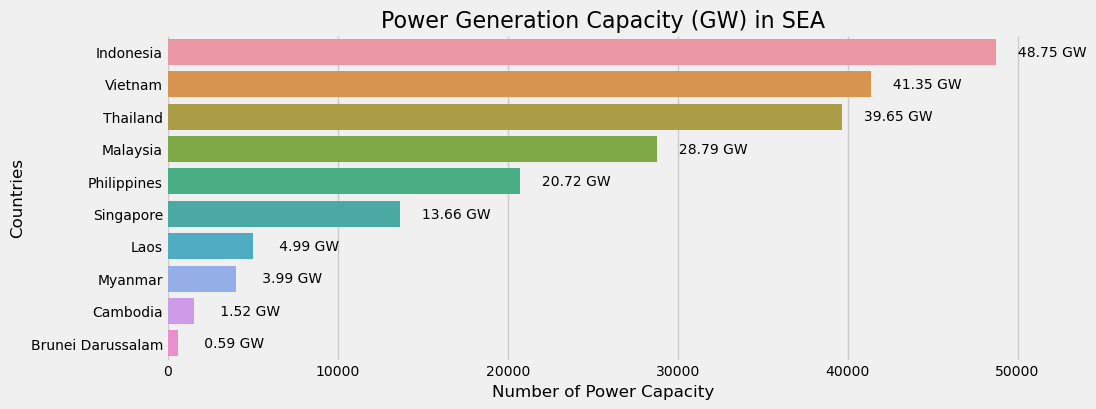

In [365]:
#plot the figure
plt.figure(figsize=(10,4))
ax = sns.barplot(data = asean, x = 'capacity in MW', y='country_long')
plt.title('Power Generation Capacity (GW) in SEA', fontsize = 16)
plt.ylabel("Countries", fontsize=12)
plt.xlabel("Number of Power Capacity", fontsize=12)

#give each value capacity for each country plotted
for p in ax.patches:
    x = p.get_width()
    cap_per = "{:>10,.2f} GW".format(x/1000)
    ax.annotate("{}".format(cap_per), (p.get_x() + p.get_width() -.6, p.get_y() + .4), ha='left', va='center' , fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)
    

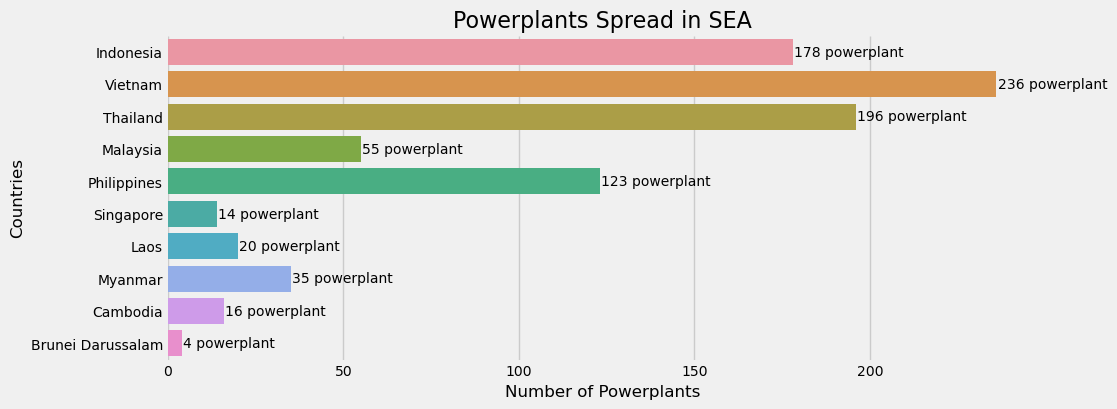

In [364]:
#plot the figure
plt.figure(figsize=(10,4))
ax = sns.barplot(data = asean, x = 'total_powerplant', y='country_long')
plt.title('Powerplants Spread in SEA', fontsize = 16)
plt.ylabel("Countries", fontsize=12)
plt.xlabel("Number of Powerplants", fontsize=12)

#give each value capacity for each country plotted
for p in ax.patches:
    x = p.get_width()
    cap_per = "{:d} powerplant".format(int(x))
    ax.annotate("{}".format(cap_per), (p.get_x() + p.get_width() +.4, p.get_y() + .4), ha='left', va='center', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)

from the data above, we can see that eventho Indonesia has less poweeplant than Vietnam and Thailand, Indonesial still the country that has the most power capacity in South-Eastern Asia

### ASEAN Estimation Power Generation Capacity in 2021

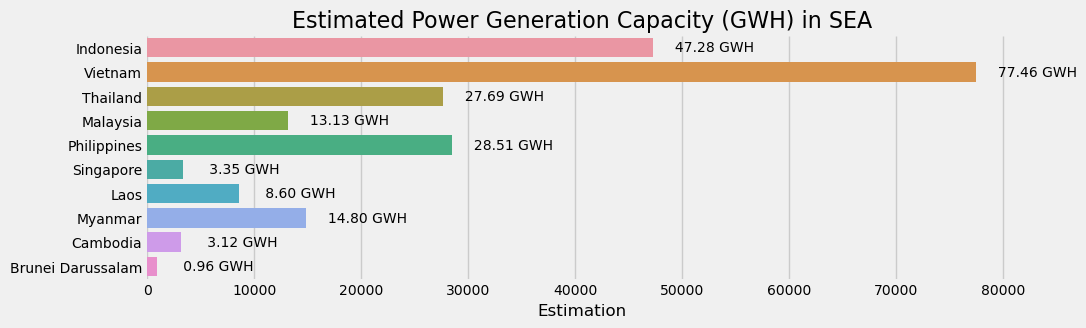

In [363]:
#plot the figure
plt.figure(figsize=(10,3))
ax = sns.barplot(data = asean, x = 'estimated_generation_gwh_2021', y='country_long')
plt.title('Estimated Power Generation Capacity (GWH) in SEA', fontsize = 16)
plt.ylabel('')
plt.xlabel("Estimation", fontsize=12)

#give each value capacity for each country plotted
for p in ax.patches:
    x = p.get_width()
    cap_per = "{:>10,.2f} GWH".format(x/1000)
    ax.annotate("{}".format(cap_per), (p.get_x() + p.get_width(), p.get_y() + .4), ha='left', va='center', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)

and, as same as the number of powerplant, Vietnam is estimated will make the most power generation in the future in South-Eastern Asia

### Fuel Used in The World

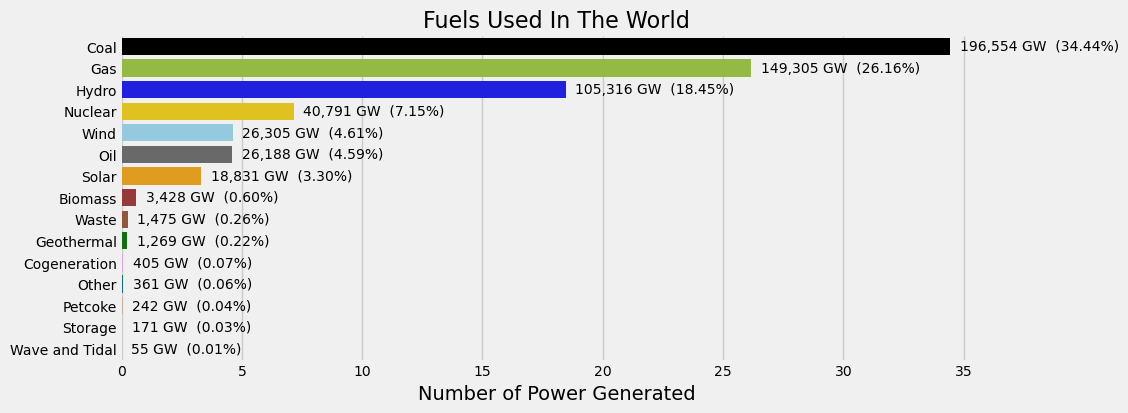

In [362]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data = df_fuel, x = 'percent', y = 'primary_fuel', palette=fuels)
plt.xlabel('Number of Power Generated'.format(df_fuel['capacity in MW'].head(3).sum()), fontsize = 14)
plt.ylabel("")

plt.title('Fuels Used In The World', fontsize=16)
for p in ax.patches:
    x = p.get_width()
    cap_per = "{:0,.0f} GW  ({:,.2f}%)".format(x * total_cap/1000, x)
    ax.annotate("{}".format(cap_per), (p.get_x() + p.get_width() + .4, p.get_y() + .4), ha='left', va='center', fontsize=10) #this line used to specify location of each number in barplot

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)

.

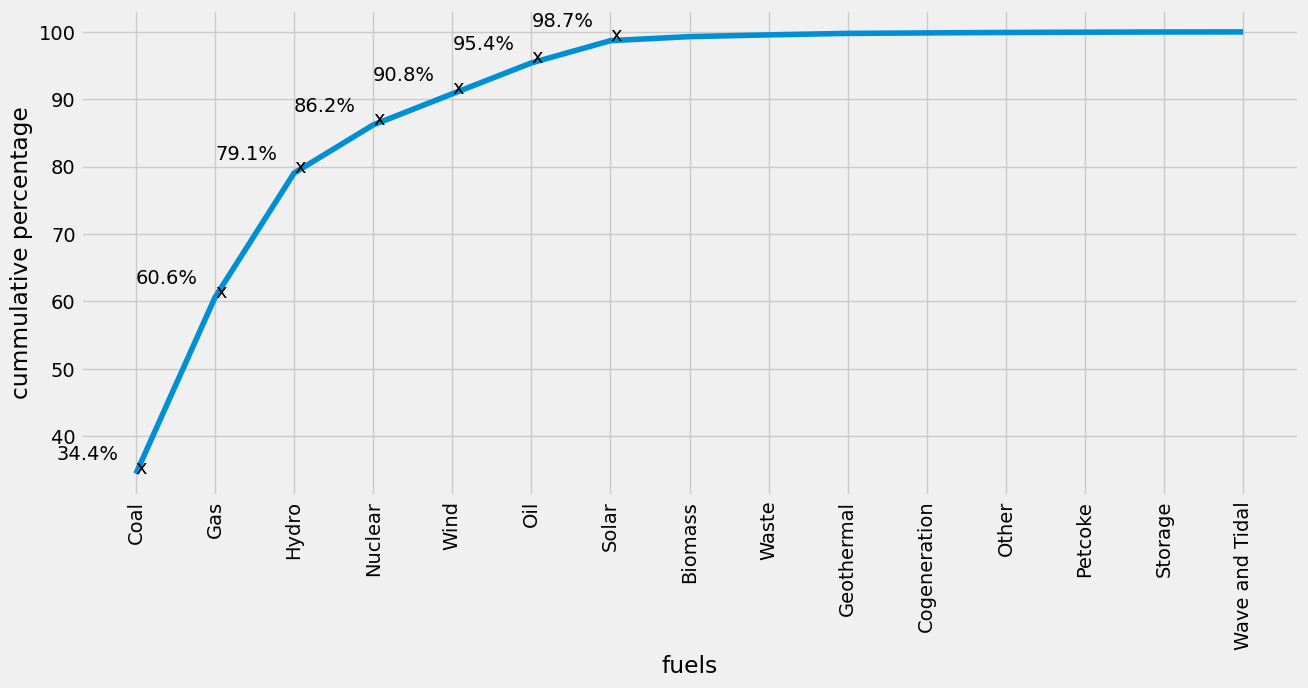

In [299]:
df_fuel['cumsum']=df_fuel['percent'].cumsum()
plt.figure(figsize=(14,6))
ax=sns.lineplot(data = df_fuel, x = 'primary_fuel', y = 'cumsum')
plt.xticks(rotation = 90)
plt.xlabel("fuels")
plt.ylabel('cummulative percentage')

for i, j in enumerate(df_fuel['primary_fuel']):
    if i <= 6:
        y = df_fuel['cumsum'].loc[i]
        plt.text(i - 1, y + 2, '{:,.1f}%'.format(y))
        plt.text(i, y, 'x', color = 'k')

as we can see above, the coal, gas, and hydro fuel is still be the most used fuel to generate power until now

## Now let's focus on our beloved country, INDONESIA

In [400]:
indo_map['popup']=df_fix['name of powerplant']+'\n /'+df_fix['primary_fuel']

indo_powerplant = folium.Map(location = [indo_map.latitude.mean()-10, indo_map.longitude.mean()+11], tiles = 'cartodbpositron', zoom_start = 4.5, width=1200, height=1200)

#add pin location to map
for idx, row in indo_map.sort_values(by = 'capacity in MW', ascending = False).iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        popup = row['popup'], #the information that will popup when we click at it
        radius = 6,
        fill = True, fill_opacity = 1,
        color = fuels.get(row['primary_fuel'])
        ).add_to(indo_powerplant)

# way to show (display) the map generated
indo_powerplant

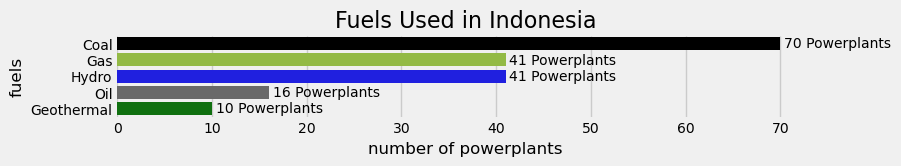

In [360]:
indo_fuel = df_fix['name of powerplant'][df_fix['country_long']=='Indonesia'].groupby(df_fix['primary_fuel']).count().sort_values(ascending=False).reset_index()
plt.subplots(figsize=(8, 1))
ax = sns.barplot(data=indo_fuel, x='name of powerplant', y='primary_fuel', palette=fuels)

for p in ax.patches:
    x=p.get_width()
    caption = "{} Powerplants".format(int(x))
    ax.annotate("{}".format(caption), (p.get_x() + p.get_width() + .4, p.get_y()+ .4), ha='left', va='center', fontsize=10 )

plt.title('Fuels Used in Indonesia', fontsize=16)
plt.ylabel('fuels', fontsize=12)
plt.xlabel('number of powerplants', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.box(False)

from what was shown above, we can see that most of the powerplants in indonesia still use coal as their primary fuel, followed by gas and hydro. And by looking at the map, we can conclude that most of the powerplants are still in Java, followed by Sumatera, Sulawesi, Kalimantan, Nusa Tenggara, and Papua which means that the spread of the powerplant in Indonesia are still Javacentric.

### Place of each powerplants by the most used fuel

maps shown bellow are map that located each powerplant uses specific fuels.

#### Coal fuel powerplants

In [421]:
indo_coal = indo_map[indo_map['primary_fuel']=='Coal']
indo_coal['popup']=indo_coal['name of powerplant']
indo_powerplant_coal = folium.Map(location = [indo_coal.latitude.mean(), indo_coal.longitude.mean()+4], tiles = 'cartodbpositron', zoom_start = 4.5)

#add pin location to map
for idx, row in indo_coal.sort_values(by = 'capacity in MW', ascending = False).iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        popup = row['popup'], #the information that will popup when we click at it
        radius = 6,
        fill = True, fill_opacity = 1,
        color = fuels.get(row['primary_fuel'])
        ).add_to(indo_powerplant_coal)

# way to show (display) the map generated
indo_powerplant_coal

#### Gas fuel powerplants

In [418]:
indo_gas = indo_map[indo_map['primary_fuel']=='Gas']
indo_gas['popup']=indo_gas['name of powerplant']
indo_powerplant_gas = folium.Map(location = [indo_gas.latitude.mean(), indo_gas.longitude.mean()+7], tiles = 'cartodbpositron', zoom_start = 4.5)

#add pin location to map
for idx, row in indo_gas.sort_values(by = 'capacity in MW', ascending = False).iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        popup = row['popup'], #the information that will popup when we click at it
        radius = 6,
        fill = True, fill_opacity = 1,
        color = fuels.get(row['primary_fuel'])
        ).add_to(indo_powerplant_gas)

# way to show (display) the map generated
indo_powerplant_gas

#### Hydro fuel powerplants

In [420]:
indo_hydro = indo_map[indo_map['primary_fuel']=='Hydro']
indo_hydro['popup']=indo_hydro['name of powerplant']
indo_powerplant_hydro = folium.Map(location = [indo_hydro.latitude.mean(), indo_hydro.longitude.mean()+8], tiles = 'cartodbpositron', zoom_start = 5)

#add pin location to map
for idx, row in indo_hydro.sort_values(by = 'capacity in MW', ascending = False).iterrows():
    folium.CircleMarker(
        location = [row['latitude'], row['longitude']],
        popup = row['popup'], #the information that will popup when we click at it
        radius = 6,
        fill = True, fill_opacity = 1,
        color = fuels.get(row['primary_fuel'])
        ).add_to(indo_powerplant_hydro)

# way to show (display) the map generated
indo_powerplant_hydro